# Twitter Sentiment Analysis (Classification using NLP)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv("Sentiment Analysis Dataset Small.csv", encoding='latin-1')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [3]:
#data type info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         500 non-null    int64 
 1   Sentiment      500 non-null    int64 
 2   SentimentText  500 non-null    object
dtypes: int64(2), object(1)
memory usage: 11.8+ KB


## Preprocessing the Data

In [4]:
# Remove pattern in the input text (@user_name)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt) # this will find all the patterns matching in the input text
    for word in r:
        input_txt = re.sub(word, '', input_txt) #this will replace all the patterns words with '' space in the input text data
    return input_txt

In [5]:
# df.sample(frac=1).head()

In [6]:
#remove twitter handles (@users ) but creating a new column for clean text
df['clean_tweet'] = np.vectorize(remove_pattern)(df['SentimentText'], '@[\w]*')

In [8]:
df.sample(frac=1).head()

,ItemID,Sentiment,SentimentText,clean_tweet
202,203,0,@HaterMagazine: @damienrandle it is now the o...,: it is now the outer fat kid.
425,426,0,Exercise 2 build muscle mass is only thing t...,Exercise 2 build muscle mass is only thing t...
417,418,0,anyone have any advice on how to cope with a...,anyone have any advice on how to cope with a...
21,22,0,wompppp wompp,wompppp wompp
192,193,1,@dandelionas is making fettucini and garlic b...,is making fettucini and garlic bread!


In [9]:
#Converting all to lowercase
df['clean_tweet'] = df['clean_tweet'].str.lower()

In [12]:
df.sample(frac=1).head()

,ItemID,Sentiment,SentimentText,clean_tweet
204,205,1,"@hawaiibuzz: &quot;yes, i am lol j/k luv this...",": &quot;yes, i am lol j/k luv this! : &quot;y..."
55,56,0,David must be hospitalized for five days end...,david must be hospitalized for five days end...
149,150,0,(tears) :'-( Today is the last day with my ki...,(tears) :'-( today is the last day with my ki...
253,254,0,@Beansummer,
102,103,1,oh thank you!,oh thank you!


In [14]:
#Removing all the puncuations from the text except the # symbol
def remove_punctuations(text):
    """
    This function accepts a text input and removes all punctuation except for the '#' symbol.

    Parameters:
    text (str): The input text.

    Returns:
    str: The text with all punctuation removed except for '#'.
    """
    # Regular expression to match all punctuation except #
    cleaned_text = re.sub(r'[^\w\s#]', '', text)
    return cleaned_text

In [15]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_punctuations(x))

In [18]:
df.sample(frac=1).head() #shuffle the data

,ItemID,Sentiment,SentimentText,clean_tweet
91,92,0,Jus Got Hom Fr. TDa Funeral... I'm So Sad! I...,jus got hom fr tda funeral im so sad i cried...
282,283,0,#squarespace #trackle no apple iphone card ...,#squarespace #trackle no apple iphone card ...
94,95,0,- Longest night ever.. ugh! http://tumblr.com...,longest night ever ugh httptumblrcomxwp1yxhi6
62,63,1,I bend backwards,i bend backwards
249,250,0,everyone went home. and not everyone was e...,everyone went home and not everyone was ev...


In [19]:
#Removing the stop words like didn't did up me there etc
from nltk.corpus import stopwords
#showing the stopwords that will be removed
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
# making a function to remove the stopwords
StopWords = set(stopwords.words('english'))
def remove_stopwords(text):
    #stopwords will replace by " " empty string
    text = ' '.join([word for word in text.split() if word not in StopWords])
    return text

In [21]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_stopwords(x))

In [22]:
df.sample(frac=1).head() #shuffle the data

,ItemID,Sentiment,SentimentText,clean_tweet
187,188,1,@chloelunn and @meganmcdowell GET YOUR FAT AS...,get fat asses nai
319,320,0,i'm so cold this morning...... i have...,im cold morning chills
326,327,1,Tiger Woods is up by 2at 18 via http://nasc...,tiger woods 2at 18 via httpnascarcomracebuddy
337,338,0,"Orlando Lost The Series. Oh Well, Mayb...",orlando lost series oh well maybe phoenix bost...
172,173,0,:[ I don't want to move!!!,dont want move


In [23]:
# Removing words whose lenght is less than 3 and greater than 10
def remove_short_and_long_words(text):
    """
    This function accepts a text input and removes all words whose lengths are
    less than 3 or greater than 10, and returns the cleaned text.

    Parameters:
    text (str): The input text.

    Returns:
    str: The text with words of length less than 3 or greater than 10 removed.
    """
    # Split the text into words
    words = text.split()
    
    # Filter words based on their length
    filtered_words = [word for word in words if 3 <= len(word) <= 10]
    
    # Join the filtered words back into a single string
    cleaned_text = ' '.join(filtered_words)
    
    return cleaned_text
# # Example usage
# input_text = "This is an example of a text with short and excessivelylongwords that need to be removed."
# cleaned_text = remove_short_and_long_words(input_text)
# print("Original Text: ", in


In [24]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_short_and_long_words(x))

In [27]:
df.sample(frac=1).head() #shuffle the data

,ItemID,Sentiment,SentimentText,clean_tweet
464,465,0,after a crap night was looking forward to bei...,crap night looking forward cheered never mind
209,210,1,@ivegotzooms I am nothing of the kind and eve...,nothing kind everything sort
217,218,1,@kcome ?????????????????????????????????? ???...,1000 followers
171,172,0,": Let's have fun,. When I give ya what I give...",lets fun give give
84,85,0,I'm finding the intercept slope..and banging...,finding intercept slopeand banging head wallma...


In [29]:
# Checking if any row have any null value/data

df.isnull().sum() #all rows that has null values in the data 

ItemID           0
Sentiment        0
SentimentText    0
clean_tweet      0
dtype: int64

### Stemming

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# Function to stem the words
def stem_words(text):
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [31]:
#we will create a new column to see the stemmed words
df['stemmed_text'] = df['clean_tweet'].apply(lambda x: stem_words(x))

In [32]:
df.sample(frac=1).head() #shuffle the data

,ItemID,Sentiment,SentimentText,clean_tweet,stemmed_text
54,55,0,congrats to helio though,congrats helio though,congrat helio though
257,258,0,"Friends like these ... no thanks, I'm not f...",friends like thanks fake,friend like thank fake
44,45,1,... health class (what a joke!),health class joke,health class joke
231,232,1,@MsNovember It's a shame all the women in Mam...,shame women mamma mia horny since men island,shame women mamma mia horni sinc men island
66,67,0,I miss Earl,miss earl,miss earl


### Lemmatization

In [33]:
#importing stuff
from nltk import pos_tag #part of speech tags.. in lemmatization it also look at part of speeches
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#initiate lemmatizer
lemmatizer = WordNetLemmatizer()

#part of speech dictionary creating
wordnet_map = {'N':wordnet.NOUN, 'V': wordnet.VERB, 'J': wordnet.ADJ, 'R': wordnet.ADV}

In [34]:
#function to lemmtize text
def lemmatize_words(text):
    #finding part of speech tag
    pos_text = pos_tag(text.split())
    #lemmatizing the word now
    text = ' '.join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])
    return text

In [35]:
#we will create a new column to see the lemmatize words
df['lemmatized_text'] = df['clean_tweet'].apply(lambda x: lemmatize_words(x))

In [37]:
df.sample(frac=1).head() #shuffle the data

,ItemID,Sentiment,SentimentText,clean_tweet,stemmed_text,lemmatized_text
339,340,1,thanks for being the bestttttttttttttttt...,thanks jdawg,thank jdawg,thanks jdawg
314,315,0,"- going in town todaÑ with mÑ cousinnn, [Ñ...",going town todañ cousinnn netball match cancel...,go town todañ cousinnn netbal match cancelledd,go town todañ cousinnn netball match cancelledd
38,39,1,uploading pictures on friendster,uploading pictures friendster,upload pictur friendster,uploading picture friendster
479,480,0,already getting sleepy...I really want to get...,already getting sleepyi really want get psych ...,alreadi get sleepyi realli want get psych quiz...,already get sleepyi really want get psych quiz...
335,336,1,Hardest working chica i know( mii boss ...,hardest working chica know mii boss lady look ...,hardest work chica know mii boss ladi look ser...,hard work chica know mii bos lady look serious...


## Exploratory Data Analysis (Visualizing the Data)

In [38]:
# visualize the frequent words
#We will combine all the sentences(rows) to a single string/variable
all_words = ' '.join([sentence for sentence in df['lemmatized_text']])

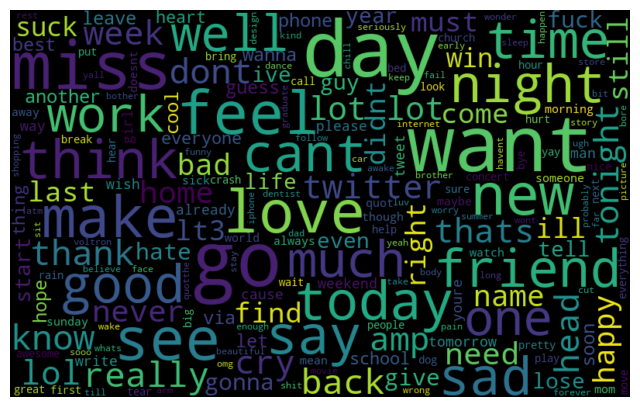

In [41]:
#visualizing using word cloud
from wordcloud import WordCloud
# initialize and generating the wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plotting the word cloud
plt.figure(figsize=(8,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
#displaying word cloud for positive and negative both separately

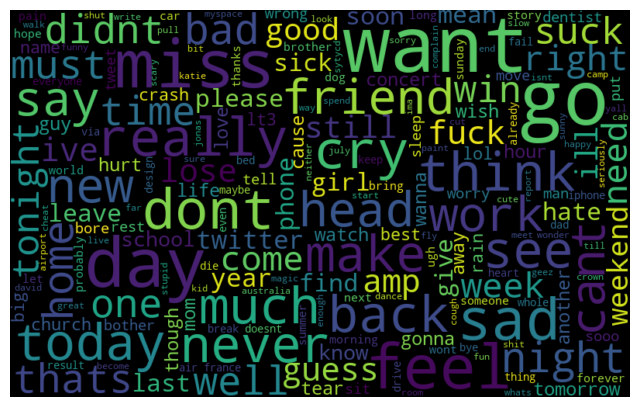

In [43]:
## This will be for the negative words
#We will combine all the sentences(rows) to a single string/variable
all_words = ' '.join([sentence for sentence in df['lemmatized_text'][df['Sentiment']==0]])

# initialize and generating the wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plotting the word cloud
plt.figure(figsize=(8,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

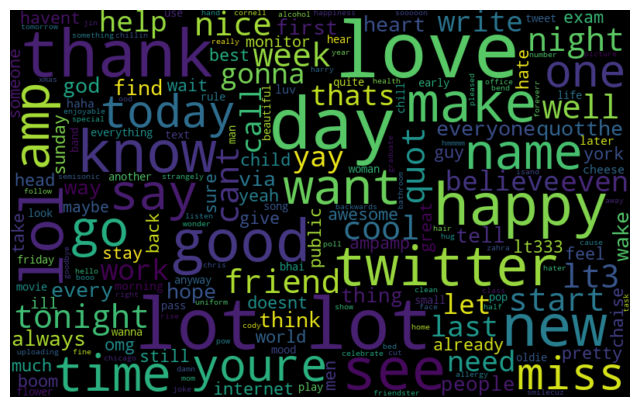

In [44]:
## This will be for the positive words
#We will combine all the sentences(rows) to a single string/variable
all_words = ' '.join([sentence for sentence in df['lemmatized_text'][df['Sentiment']==1]])

# initialize and generating the wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plotting the word cloud
plt.figure(figsize=(8,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
#lets display in bar charts -- We will display the words with hashtags (#)

In [49]:
# extracting words with the hashtags #
def hashtag_extract(tweets): #excepting a tweet or sentence
    hashtags = [] # creating a list
    # Loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r'#(\w+)', tweet) #regular expression to get all words with # hashtag
        hashtags.append(ht) # adding the words with # hashtag to this list
    return hashtags

In [54]:
# extracting hashtags # from negative tweets
ht_negative = hashtag_extract(df['lemmatized_text'][df['Sentiment']==0])

# extracting hashtags # from positive tweets
ht_positive = hashtag_extract(df['lemmatized_text'][df['Sentiment']==1])

In [58]:
ht_negative[:5] #displaing only first 5

[[], [], [], [], []]

In [57]:
ht_positive[:5]

[[], [], [], [], []]

In [59]:
# unnest list ... converting to single list
ht_negative = sum(ht_negative, [])
ht_positive = sum(ht_positive, [])

In [60]:
ht_negative[:5] #displaing only first 5

['asylm', 'susan', 'twenty20', 'name', 'iphone']

In [61]:
ht_positive[:5]

['name', 'video', 'name', 'name', '29']

In [66]:
# Converting to pandas data frame to count the hastags frequencyvfor positive
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,name,5
1,video,1
2,29,1
3,skydiving,1


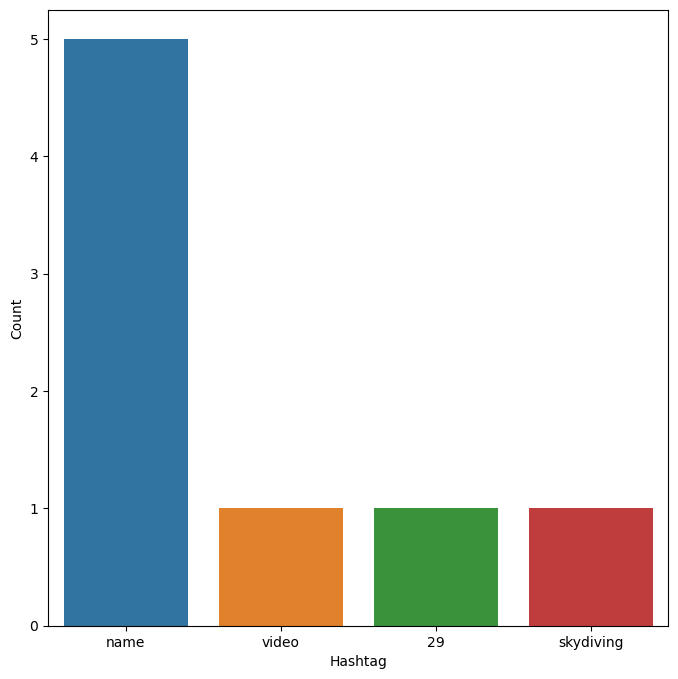

In [67]:
#selecting the top 10 hshtags
d = d.nlargest(columns = 'Count', n=8)
plt.figure(figsize=(8,8))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [68]:
# Converting to pandas data frame to count the hastags frequencyvfor negative
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,asylm,1
1,susan,1
2,twenty20,1
3,name,3
4,iphone,1


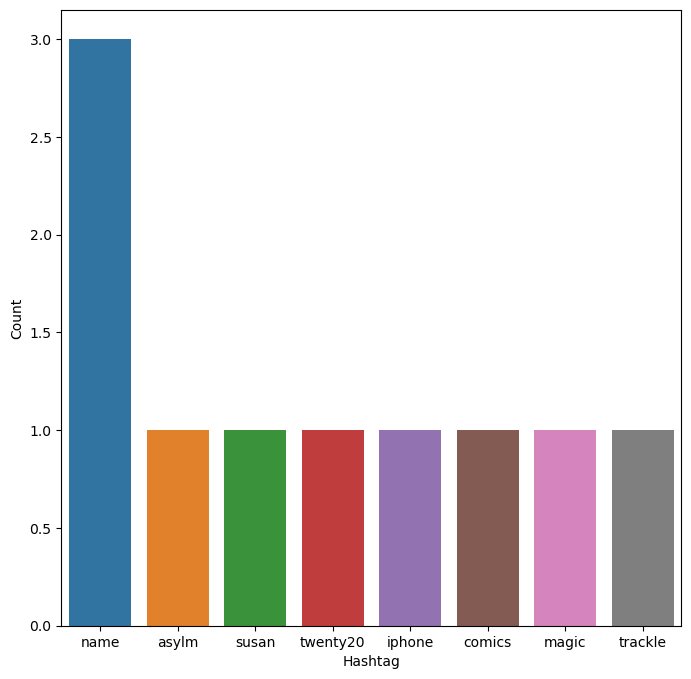

In [69]:
#selecting the top 10 hshtags
d = d.nlargest(columns = 'Count', n=8)
plt.figure(figsize=(8,8))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

## Feature Extraction

### We will Extract Bow Features and Bow Features with 2 n-grams and Tf-Idf features for both stemmed Text and Lemmatized Text

#### Bow Features

In [71]:
# This is for Stemmed text

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
#initialize the object
bow_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
bow_stemmed = bow_vectorizer.fit_transform(df['stemmed_text'])
bow_stemmed #Feature matrix to feed to a ML Model is ready

<500x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2064 stored elements in Compressed Sparse Row format>

In [75]:
# This is for Lemmatized text

In [76]:
bow_lemmatized = bow_vectorizer.fit_transform(df['lemmatized_text'])
bow_lemmatized #Feature matrix to feed to a ML Model is ready

<500x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2010 stored elements in Compressed Sparse Row format>

#### TF-IDF Features

In [79]:
#importing tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
#initialize
tfidf = TfidfVectorizer(max_features=1000, stop_words='english') # it will remove the stop words by default

In [80]:
#for stemmed Text

In [81]:
tfidf_stemmed = tfidf.fit_transform(df['stemmed_text'])
tfidf_stemmed

<500x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2064 stored elements in Compressed Sparse Row format>

In [82]:
#for lemmatized Text

In [83]:
tfidf_lemmatized = tfidf.fit_transform(df['lemmatized_text'])
tfidf_lemmatized 

<500x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2010 stored elements in Compressed Sparse Row format>

#### N-Grams (uni and bi)

In [84]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,2)) #this will take unigrams and bigrams now

In [85]:
# For Stemmed Text

In [88]:
bow_stemmed_ngrams = cv.fit_transform(df['stemmed_text'])
bow_stemmed_ngrams #Feature matrix to feed to a ML Model is ready

<500x3360 sparse matrix of type '<class 'numpy.int64'>'
	with 4468 stored elements in Compressed Sparse Row format>

In [87]:
# for lemmatized text

In [89]:
bow_lemmatized_ngrams = cv.fit_transform(df['stemmed_text'])
bow_lemmatized_ngrams #Feature matrix to feed to a ML Model is ready

<500x3360 sparse matrix of type '<class 'numpy.int64'>'
	with 4468 stored elements in Compressed Sparse Row format>

## Spliting the data into Train & Test

In [92]:
# We have 6 Features Matrix 1. Bow Stemmed and Bow Lemmatize 2. Tfidf for stemmed and Lemmatized 3. Bow n-grams for Stemmed and Lemmatized
from sklearn.model_selection import train_test_split

In [94]:
# Bow Features for both lemmatized text and stemmed text
bowStemx_train, bowStemx_test, bowStemy_train, bowStemy_test = train_test_split(bow_stemmed, df['Sentiment'], random_state=42, test_size=0.25)
bowLemx_train, bowLemx_test, bowLemy_train, bowLemy_test = train_test_split(bow_lemmatized, df['Sentiment'], random_state=42, test_size=0.25)

# Tfidf Features for both lemmatized text and stemmed text
tfStemx_train, tfStemx_test, tfStemy_train, tfStemy_test = train_test_split(tfidf_stemmed, df['Sentiment'], random_state=42, test_size=0.25)
tfLemx_train, tfLemx_test, tfLemy_train, tfLemy_test = train_test_split(tfidf_lemmatized, df['Sentiment'], random_state=42, test_size=0.25)

# n-grams Features for both lemmatized text and stemmed text
ngramStemx_train, ngramStemx_test, ngramStemy_train, ngramStemy_test = train_test_split(bow_stemmed_ngrams, df['Sentiment'], random_state=42, test_size=0.25)
ngramLemx_train, ngramLemx_test, ngramLemy_train, ngramLemy_test = train_test_split(bow_lemmatized_ngrams, df['Sentiment'], random_state=42, test_size=0.25)

## Model Training on SVM, Logistic Regression and Naive Bayes

In [103]:
from sklearn.naive_bayes import MultinomialNB # for naive bayes classification
from sklearn.linear_model import LogisticRegression # for logistic regression classificaiton
from sklearn.svm import SVC # for svm classification
from sklearn.metrics import f1_score, accuracy_score # for measuring the accuracy and f1_score

#### Logistic Regression

In [100]:
# Logistic Regression For  bowStem
bowStem_model_lg = LogisticRegression()
bowStem_model_lg.fit(bowStemx_train, bowStemy_train)

# Logistic Regression For  bowLem
bowLem_model_lg = LogisticRegression()
bowLem_model_lg.fit(bowLemx_train, bowLemy_train)

#Logistic Regression for tfidf Stem
tfidfStem_model_lg = LogisticRegression()
tfidfStem_model_lg.fit(tfStemx_train, tfStemy_train)

#Logistic Regression for tfidf Lem
tfidfLem_model_lg = LogisticRegression()
tfidfLem_model_lg.fit(tfLemx_train, tfLemy_train)

#Logistic Regression for n-grams Stem
ngramStem_model_lg = LogisticRegression()
ngramStem_model_lg.fit(ngramStemx_train, ngramStemy_train)

#Logistic Regression for n-grams Lem
ngramLem_model_lg = LogisticRegression()
ngramLem_model_lg.fit(ngramLemx_train, ngramLemy_train)

LogisticRegression()

#### Naive Bayes

In [101]:
# NB For  bowStem
bowStem_model_nb = MultinomialNB()
bowStem_model_nb.fit(bowStemx_train, bowStemy_train)

# NB For  bowLem
bowLem_model_nb = MultinomialNB()
bowLem_model_nb.fit(bowLemx_train, bowLemy_train)

#NB for tfidf Stem
tfidfStem_model_nb = MultinomialNB()
tfidfStem_model_nb.fit(tfStemx_train, tfStemy_train)

#NB for tfidf Lem
tfidfLem_model_nb = MultinomialNB()
tfidfLem_model_nb.fit(tfLemx_train, tfLemy_train)

#NB for n-grams Stem
ngramStem_model_nb = MultinomialNB()
ngramStem_model_nb.fit(ngramStemx_train, ngramStemy_train)

#NB for n-grams Lem
ngramLem_model_nb = MultinomialNB()
ngramLem_model_nb.fit(ngramLemx_train, ngramLemy_train)

MultinomialNB()

#### SVM

In [102]:
# SVM For  bowStem
bowStem_model_svm = SVC()
bowStem_model_svm.fit(bowStemx_train, bowStemy_train)

# SVM For  bowLem
bowLem_model_svm = SVC()
bowLem_model_svm.fit(bowLemx_train, bowLemy_train)

#SVM for tfidf Stem
tfidfStem_model_svm = SVC()
tfidfStem_model_svm.fit(tfStemx_train, tfStemy_train)

#SVM for tfidf Lem
tfidfLem_model_svm = SVC()
tfidfLem_model_svm.fit(tfLemx_train, tfLemy_train)

#SVM for n-grams Stem
ngramStem_model_svm = SVC()
ngramStem_model_svm.fit(ngramStemx_train, ngramStemy_train)

#SVM for n-grams Lem
ngramLem_model_svm = SVC()
ngramLem_model_svm.fit(ngramLemx_train, ngramLemy_train)

SVC()

### Testing the Models We created for every feature extraction technique with both Stemmed and Lemmatized words

### Logistic Regression Testing

In [115]:
#predicting bow stem on lg
pred_lg_bow_stem = bowStem_model_lg.predict(bowStemx_test)
#F-1 score and accuracy for bow stem on lg
print('Bow Stemmed Text Logistic Regression F1-Score: ', f1_score(bowStemy_test, pred_lg_bow_stem))
print('Bow Stemmed Text Logistic Regression Accuracy: ', accuracy_score(bowStemy_test, pred_lg_bow_stem))
print('')

#predicting bow Lem on lg
pred_lg_bow_lem = bowLem_model_lg.predict(bowLemx_test)
#F-1 score and accuracy for bow lem on lg
print('Bow Lemmatized Text Logistic Regression F1-Score: ', f1_score(bowLemy_test, pred_lg_bow_lem))
print('Bow Lemmatized Text Logistic Regression Accuracy: ', accuracy_score(bowLemy_test, pred_lg_bow_lem))
print('')

#predicting tf-idf stem on lg
pred_lg_tfidf_stem = tfidfStem_model_lg.predict(tfStemx_test)
#F-1 score and accuracy for bow stem on lg
print('TFIDF Stemmed Text Logistic Regression F1-Score: ', f1_score(tfStemy_test, pred_lg_tfidf_stem))
print('TFIDF Stemmed Text Logistic Regression Accuracy: ', accuracy_score(tfStemy_test, pred_lg_tfidf_stem))
print('')

#predicting tf-idf Lem on lg
pred_lg_tfidf_lem = tfidfLem_model_lg.predict(tfLemx_test)
#F-1 score and accuracy for bow stem on lg
print('TFIDF Lemmatized Text Logistic Regression F1-Score: ', f1_score(tfLemy_test, pred_lg_tfidf_lem))
print('TFIDF Lemmatized Text Logistic Regression Accuracy: ', accuracy_score(tfLemy_test, pred_lg_tfidf_lem))
print('')

#predicting n-grams stem on lg
pred_lg_ngram_stem = ngramStem_model_lg.predict(ngramStemx_test)
#F-1 score and accuracy for bow stem on lg
print('N-Grams Stemmed Text Logistic Regression F1-Score: ', f1_score(ngramStemy_test, pred_lg_ngram_stem))
print('n-Grams Stemmed Text Logistic Regression Accuracy: ', accuracy_score(ngramStemy_test, pred_lg_ngram_stem))
print('')

#predicting n-grams lem on lg
pred_lg_ngram_lem = ngramLem_model_lg.predict(ngramLemx_test)
#F-1 score and accuracy for bow stem on lg
print('N-Grams Lemmatized Text Logistic Regression F1-Score: ', f1_score(ngramLemy_test, pred_lg_ngram_lem))
print('n-Grams Lemmatized Text Logistic Regression Accuracy: ', accuracy_score(ngramLemy_test, pred_lg_ngram_lem))
print('')

Bow Stemmed Text Logistic Regression F1-Score:  0.4074074074074074
Bow Stemmed Text Logistic Regression Accuracy:  0.744

Bow Lemmatized Text Logistic Regression F1-Score:  0.3529411764705882
Bow Lemmatized Text Logistic Regression Accuracy:  0.736

TFIDF Stemmed Text Logistic Regression F1-Score:  0.18181818181818182
TFIDF Stemmed Text Logistic Regression Accuracy:  0.712

TFIDF Lemmatized Text Logistic Regression F1-Score:  0.13953488372093026
TFIDF Lemmatized Text Logistic Regression Accuracy:  0.704

N-Grams Stemmed Text Logistic Regression F1-Score:  0.28
n-Grams Stemmed Text Logistic Regression Accuracy:  0.712

N-Grams Lemmatized Text Logistic Regression F1-Score:  0.28
n-Grams Lemmatized Text Logistic Regression Accuracy:  0.712



### NB Testing

In [118]:
#predicting bow stem on nb
pred_nb_bow_stem = bowStem_model_nb.predict(bowStemx_test)
#F-1 score and accuracy for bow stem on NB
print('Bow Stemmed Text NB F1-Score: ', f1_score(bowStemy_test, pred_nb_bow_stem))
print('Bow Stemmed Text NB Accuracy: ', accuracy_score(bowStemy_test, pred_nb_bow_stem))
print('')

#predicting bow Lem on nb
pred_nb_bow_lem = bowLem_model_nb.predict(bowLemx_test)
#F-1 score and accuracy for bow lem on NB
print('Bow Lemmatized Text NB F1-Score: ', f1_score(bowLemy_test, pred_nb_bow_lem))
print('Bow Lemmatized Text NB Accuracy: ', accuracy_score(bowLemy_test, pred_nb_bow_lem))
print('')

#predicting tf-idf stem on nb
pred_nb_tfidf_stem = tfidfStem_model_nb.predict(tfStemx_test)
#F-1 score and accuracy for bow stem on nb
print('TFIDF Stemmed Text NB F1-Score: ', f1_score(tfStemy_test, pred_nb_tfidf_stem))
print('TFIDF Stemmed Text NB Accuracy: ', accuracy_score(tfStemy_test, pred_nb_tfidf_stem))
print('')

#predicting tf-idf Lem on NB
pred_nb_tfidf_lem = tfidfLem_model_nb.predict(tfLemx_test)
#F-1 score and accuracy for bow stem on nb
print('TFIDF Lemmatized Text NB F1-Score: ', f1_score(tfLemy_test, pred_nb_tfidf_lem))
print('TFIDF Lemmatized Text NB Accuracy: ', accuracy_score(tfLemy_test, pred_nb_tfidf_lem))
print('')

#predicting n-grams stem on NB
pred_nb_ngram_stem = ngramStem_model_nb.predict(ngramStemx_test)
#F-1 score and accuracy for bow stem on nb
print('N-Grams Stemmed Text NB F1-Score: ', f1_score(ngramStemy_test, pred_nb_ngram_stem))
print('n-Grams Stemmed Text NB Accuracy: ', accuracy_score(ngramStemy_test, pred_nb_ngram_stem))
print('')

#predicting n-grams lem on NB
pred_nb_ngram_lem = ngramLem_model_nb.predict(ngramLemx_test)
#F-1 score and accuracy for bow stem on nb
print('N-Grams Lemmatized Text NB F1-Score: ', f1_score(ngramLemy_test, pred_nb_ngram_lem))
print('n-Grams Lemmatized Text NB Accuracy: ', accuracy_score(ngramLemy_test, pred_nb_ngram_lem))
print('')

Bow Stemmed Text NB F1-Score:  0.5333333333333333
Bow Stemmed Text NB Accuracy:  0.72

Bow Lemmatized Text NB F1-Score:  0.47761194029850745
Bow Lemmatized Text NB Accuracy:  0.72

TFIDF Stemmed Text NB F1-Score:  0.2222222222222222
TFIDF Stemmed Text NB Accuracy:  0.72

TFIDF Lemmatized Text NB F1-Score:  0.18181818181818182
TFIDF Lemmatized Text NB Accuracy:  0.712

N-Grams Stemmed Text NB F1-Score:  0.4948453608247423
n-Grams Stemmed Text NB Accuracy:  0.608

N-Grams Lemmatized Text NB F1-Score:  0.4948453608247423
n-Grams Lemmatized Text NB Accuracy:  0.608



### SVM Testing

In [117]:
#predicting bow stem on svm
pred_svm_bow_stem = bowStem_model_svm.predict(bowStemx_test)
#F-1 score and accuracy for bow stem on svm
print('Bow Stemmed Text SVM F1-Score: ', f1_score(bowStemy_test, pred_svm_bow_stem))
print('Bow Stemmed Text SVM Accuracy: ', accuracy_score(bowStemy_test, pred_svm_bow_stem))
print('')

#predicting bow Lem on svm
pred_svm_bow_lem = bowLem_model_svm.predict(bowLemx_test)
#F-1 score and accuracy for bow lem on svm
print('Bow Lemmatized Text SVM F1-Score: ', f1_score(bowLemy_test, pred_svm_bow_lem))
print('Bow Lemmatized Text SVM Accuracy: ', accuracy_score(bowLemy_test, pred_svm_bow_lem))
print('')

#predicting tf-idf stem on svm
pred_svm_tfidf_stem = tfidfStem_model_svm.predict(tfStemx_test)
#F-1 score and accuracy for bow stem on svm
print('TFIDF Stemmed Text SVM F1-Score: ', f1_score(tfStemy_test, pred_svm_tfidf_stem))
print('TFIDF Stemmed Text SVM Accuracy: ', accuracy_score(tfStemy_test, pred_svm_tfidf_stem))
print('')

#predicting tf-idf Lem on svm
pred_svm_tfidf_lem = tfidfLem_model_svm.predict(tfLemx_test)
#F-1 score and accuracy for bow stem on svm
print('TFIDF Lemmatized Text SVM F1-Score: ', f1_score(tfLemy_test, pred_svm_tfidf_lem))
print('TFIDF Lemmatized Text SVM Accuracy: ', accuracy_score(tfLemy_test, pred_svm_tfidf_lem))
print('')

#predicting n-grams stem on svm
pred_svm_ngram_stem = ngramStem_model_svm.predict(ngramStemx_test)
#F-1 score and accuracy for bow stem on svm
print('N-Grams Stemmed Text SVM F1-Score: ', f1_score(ngramStemy_test, pred_svm_ngram_stem))
print('n-Grams Stemmed Text SVM Accuracy: ', accuracy_score(ngramStemy_test, pred_svm_ngram_stem))
print('')

#predicting n-grams lem on svm
pred_svm_ngram_lem = ngramLem_model_svm.predict(ngramLemx_test)
#F-1 score and accuracy for bow stem on svm
print('N-Grams Lemmatized Text SVM F1-Score: ', f1_score(ngramLemy_test, pred_svm_ngram_lem))
print('n-Grams Lemmatized Text SVM Accuracy: ', accuracy_score(ngramLemy_test, pred_svm_ngram_lem))
print('')

Bow Stemmed Text SVM F1-Score:  0.09756097560975609
Bow Stemmed Text SVM Accuracy:  0.704

Bow Lemmatized Text SVM F1-Score:  0.05
Bow Lemmatized Text SVM Accuracy:  0.696

TFIDF Stemmed Text SVM F1-Score:  0.13636363636363635
TFIDF Stemmed Text SVM Accuracy:  0.696

TFIDF Lemmatized Text SVM F1-Score:  0.09523809523809523
TFIDF Lemmatized Text SVM Accuracy:  0.696

N-Grams Stemmed Text SVM F1-Score:  0.0
n-Grams Stemmed Text SVM Accuracy:  0.688

N-Grams Lemmatized Text SVM F1-Score:  0.0
n-Grams Lemmatized Text SVM Accuracy:  0.688



## Using Probability to get the output

In [123]:
pred_prob = bowLem_model_nb.predict_proba(bowLemx_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int32)

f1_score(bowLemy_test, pred)

0.5454545454545455

## Predicting a sentence on any of the above trained model

In [136]:
# Function to predict sentiment of a given sentence using the trained models
def predict_sentiment(text, vectorizer, model):
    """
    This function predicts the sentiment of a given text using the trained SVM model.

    Parameters:
    text (str): The input text.
    vectorizer (CountVectorizer): The fitted CountVectorizer used for feature extraction.
    model (SVC): The trained SVM model.

    Returns:
    str: The predicted sentiment ('positive' or 'negative').
    """
    # Transform the input text using the fitted vectorizer
    text_vector = vectorizer.transform([text])
    
    # Predict the sentiment using the trained SVM model
    prediction = model.predict(text_vector)
    if prediction[0] == 0:
        return 'Negative'
    else:
        return 'positive'
    
# Example usage
sentence = "I am happy because the day is very nice."
predicted_sentiment = predict_sentiment(sentence, bow_vectorizer, bowStem_model_nb)
print(f"The predicted sentiment for the sentence is: {predicted_sentiment}")


The predicted sentiment for the sentence is: positive
